### Loading Dataset

In [84]:
## Loading data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
pharma_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


### Data Cleaning

In [85]:
## Viewing information related to data

pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [86]:
## Filling missing data with mode values

pharma_data['A'].fillna(pharma_data['A'].mode()[0],inplace=True)
pharma_data['B'].fillna(pharma_data['B'].mode()[0],inplace=True)
pharma_data['C'].fillna(pharma_data['C'].mode()[0],inplace=True)
pharma_data['D'].fillna(pharma_data['D'].mode()[0],inplace=True)
pharma_data['E'].fillna(pharma_data['E'].mode()[0],inplace=True)
pharma_data['F'].fillna(pharma_data['F'].mode()[0],inplace=True)
pharma_data['Z'].fillna(pharma_data['Z'].mode()[0],inplace=True)

In [87]:
## Combined column of A-Z

pharma_data['Number_of_prev_cond'].fillna((pharma_data['A']+pharma_data['B']+pharma_data['C']+pharma_data['D']+pharma_data['E']
                                           +pharma_data['F'],pharma_data['Z'])[0],inplace=True)

In [88]:
## Dropping the column "Number_of_prev_cond" since the sum isn't needed due to individual values from A-Z available.
## Dropping the column "ID_Patient_Care_Situation" since ID does not impact the results.

df_data = pharma_data.drop(["ID_Patient_Care_Situation","Patient_ID","Number_of_prev_cond"],axis=1)
pharma_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


### Exploratory Data Analysis

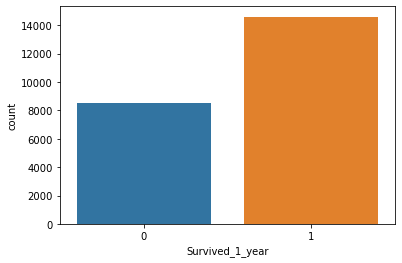

In [150]:
## Visualizing Survival Frequency

sns.countplot(x='Survived_1_year', data=pharma_data)
plt.show()

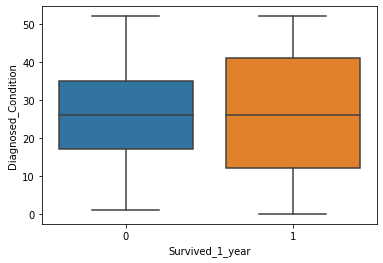

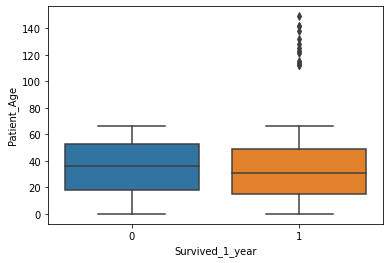

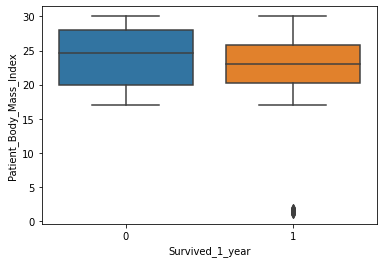

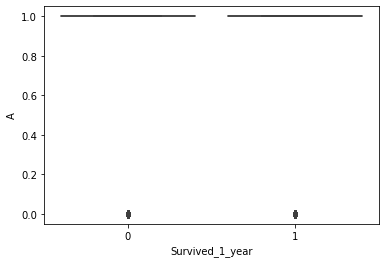

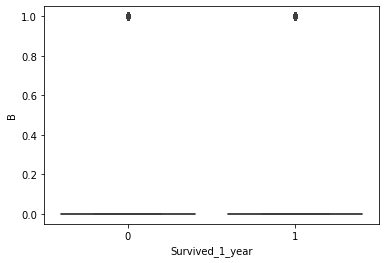

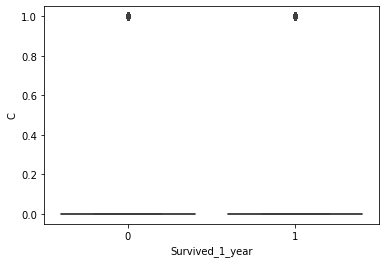

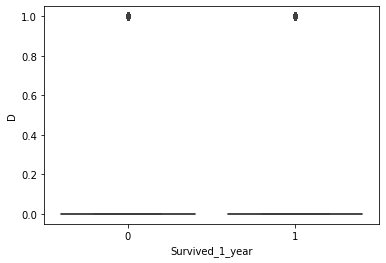

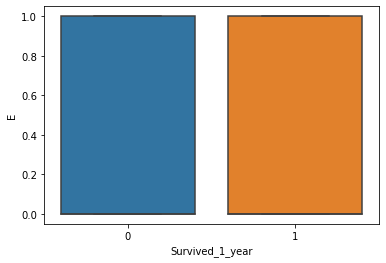

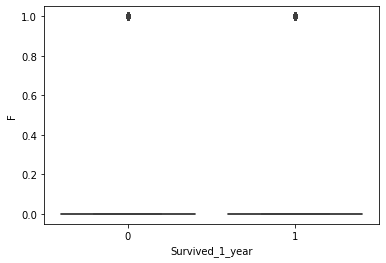

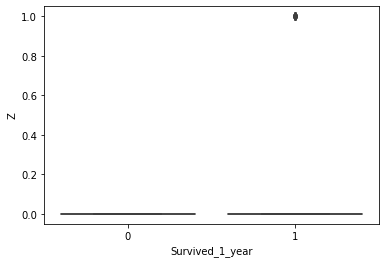

ValueError: Could not interpret input 'Treated_with_drugs_DX1 '

In [151]:
## Box-Plot

for feature in pharma_data_2.drop('Survived_1_year', axis = 1).columns:
  sns.boxplot(x='Survived_1_year', y=feature, data=pharma_data)
  plt.show()

In [ ]:
## Visualization of categorical columns

for feature in ['Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition']:
  sns.countplot(x=feature,  hue='Survived_1_year', data=pharma_data)
  plt.show()


plt.figure(figsize=(15,5))
sns.countplot(x='Treated_with_drugs',  hue='Survived_1_year', data=pharma_data)
plt.xticks(rotation=90)
plt.show()

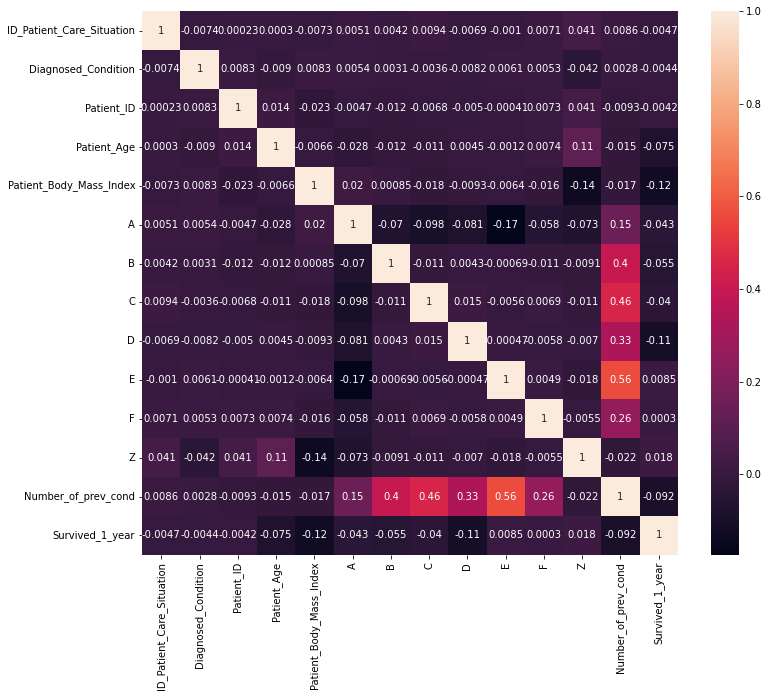

In [152]:
## Drawing Heatmap

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
cor = pharma_data.corr()
sns.heatmap(cor,annot=True)
plt.show()

In [153]:
## Extracting Numerical Values

numeric_data=pharma_data[['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index', 'Number_of_prev_cond', 'Survived_1_year']]  #keeping in the target varibale for analysis purposes
numeric_data.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year
0,8,56,18.479385,2.0,0
1,5,36,22.945566,1.0,1
2,23,48,27.510027,1.0,0
3,51,5,19.130976,1.0,1
4,0,128,1.348400,1.0,1


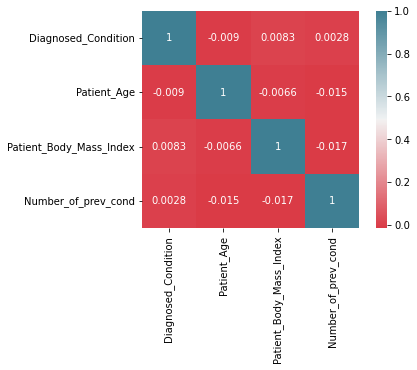

In [154]:
## Box-Plot for Numeric Data

numeric_data = numeric_data.drop(['Survived_1_year'], axis=1)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(numeric_data.corr(),
            cmap = colormap,
            square = True,
            annot = True)
plt.show()

In [155]:
## Converting categorical values to continous values

pharma_data_2=pd.get_dummies(pharma_data, columns=["Treated_with_drugs","Patient_Smoker","Patient_Rural_Urban","Patient_mental_condition"])
pharma_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 52 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID_Patient_Care_Situation                23097 non-null  int64  
 1   Diagnosed_Condition                      23097 non-null  int64  
 2   Patient_ID                               23097 non-null  int64  
 3   Patient_Age                              23097 non-null  int64  
 4   Patient_Body_Mass_Index                  23097 non-null  float64
 5   A                                        23097 non-null  float64
 6   B                                        23097 non-null  float64
 7   C                                        23097 non-null  float64
 8   D                                        23097 non-null  float64
 9   E                                        23097 non-null  float64
 10  F                                        23097

## Machine Learning - Linear Regression

In [156]:
## Normalizing values

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,r2_score
from sklearn.preprocessing import MinMaxScaler

pharma_data_2.drop(["ID_Patient_Care_Situation","Patient_ID","Number_of_prev_cond"], inplace =True, axis = 1)

x_vals = pharma_data_2.drop(['Survived_1_year'], axis=1)  
y_vals = pharma_data_2[['Survived_1_year']]  

norm = MinMaxScaler().fit(x_vals)
X_norm = pd.DataFrame(norm.transform(x_vals))
X_norm.columns=x_vals.columns

In [157]:
## Splitting data into test and train set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_norm,y_vals,test_size=0.3,random_state=1)

In [129]:
## Fitting Linear Regression Model

linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [130]:
## Linear Regression Intercept

linreg.intercept_

array([-9.85076133e+12])

In [131]:
## Linear Regression Co-efficients

linreg.coef_

array([[-4.00686458e-03, -9.05359403e-02, -4.87280013e-01,
        -1.03519488e-01, -9.05863696e-02, -6.92484140e-02,
        -2.03515116e-01, -1.04654062e-02, -5.70936444e-03,
         3.92221383e+12,  3.46693014e+12,  3.46693014e+12,
         3.46693014e+12,  3.46693014e+12,  3.46693014e+12,
         3.46693014e+12,  3.46693014e+12,  3.46693014e+12,
         3.46693014e+12,  3.46693014e+12,  3.46693014e+12,
         3.46693014e+12,  3.46693014e+12,  3.46693014e+12,
         3.46693014e+12,  3.46693014e+12,  3.46693014e+12,
         3.46693014e+12,  3.46693014e+12,  3.46693014e+12,
         3.46693014e+12,  3.46693014e+12,  3.46693014e+12,
         3.46693014e+12,  3.46693014e+12,  3.46693014e+12,
         3.46693014e+12,  3.46693014e+12,  3.46693014e+12,
         3.46693014e+12,  3.46693014e+12,  3.46693014e+12,
         3.23520131e+12,  3.69048500e+12,  3.69048500e+12,
         2.69334619e+12,  2.69334619e+12,  0.00000000e+00]])

In [132]:
## Predicting the variable

predict = linreg.predict(x_test)

In [133]:
## R2 score metric

f1 = r2_score(y_test,predict)
print("R2 Score Accuracy is ", f1)

R2 Score Accuracy is  0.21995461688008067


## Machine Learning - Logistic Regression

In [134]:
## Logistic Regression Model

logreg = LogisticRegression(max_iter=1000)

logreg.fit(x_train,y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [135]:
## Linear Regression Intercept

logreg.intercept_

array([3.74140748])

In [136]:
## Linear Regression Co-efficients

logreg.coef_

array([[-0.03203334, -0.14208183, -2.17044503, -0.6001561 , -0.4741845 ,
        -0.36538597, -1.06912479, -0.04719036, -0.0068262 ,  0.13553844,
        -0.17089522, -0.63866827, -1.00592458,  0.21581857,  0.35766257,
         0.07948048, -0.68386461, -0.05409861,  0.38085862,  0.20040773,
         0.40769493, -0.02650491,  0.59978362, -0.10220257,  0.89198638,
         0.84537712, -0.34732622, -0.24252567, -0.14947445,  0.12427088,
         0.2161953 , -0.369542  ,  0.45288877,  0.35383147, -0.22066454,
        -0.20072675,  0.36206687,  0.60211176, -0.44015586,  0.02627837,
         0.23291805, -1.8034901 ,  0.13553844,  0.59486583, -0.7012987 ,
         0.32651756, -0.297412  ,  0.        ]])

In [137]:
## Predicting the variable

predict = logreg.predict(x_test)

In [138]:
## F1 Score for Classification

f1 = f1_score(y_test,predict)
print("F1 Score Accuracy is ", f1)

F1 Score Accuracy is  0.8015291494106404


### Between Linear and Logistic Regression, clearly Logistic is a better choice!

In [139]:
## Loading the test data

test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')
test_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,18245,11,9299,DX6,28,29.106314,NO,RURAL,Stable,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0
9299,15598,7,6273,DX1,4,20.616673,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
9300,11885,16,11473,DX1 DX3 DX4 DX5,20,24.727357,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9301,25101,50,5681,DX4,33,17.517426,NO,URBAN,Stable,1.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0


In [140]:
## Viewing information related to data

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9303 non-null   int64  
 1   Diagnosed_Condition        9303 non-null   int64  
 2   Patient_ID                 9303 non-null   int64  
 3   Treated_with_drugs         9303 non-null   object 
 4   Patient_Age                9303 non-null   int64  
 5   Patient_Body_Mass_Index    9303 non-null   float64
 6   Patient_Smoker             9303 non-null   object 
 7   Patient_Rural_Urban        9303 non-null   object 
 8   Patient_mental_condition   9303 non-null   object 
 9   A                          9303 non-null   float64
 10  B                          9303 non-null   float64
 11  C                          9303 non-null   float64
 12  D                          9303 non-null   float64
 13  E                          9303 non-null   float

In [141]:
## Converting categorical values to continous values

test_data_2=pd.get_dummies(test_data, columns=["Treated_with_drugs","Patient_Smoker","Patient_Rural_Urban","Patient_mental_condition"])
test_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 50 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID_Patient_Care_Situation                9303 non-null   int64  
 1   Diagnosed_Condition                      9303 non-null   int64  
 2   Patient_ID                               9303 non-null   int64  
 3   Patient_Age                              9303 non-null   int64  
 4   Patient_Body_Mass_Index                  9303 non-null   float64
 5   A                                        9303 non-null   float64
 6   B                                        9303 non-null   float64
 7   C                                        9303 non-null   float64
 8   D                                        9303 non-null   float64
 9   E                                        9303 non-null   float64
 10  F                                        9303 no

In [142]:
## Dropping variables and assigning predict variable

test_data_2.drop(["ID_Patient_Care_Situation","Patient_ID","Number_of_prev_cond"], inplace=True, axis=1)
test_data_2["prediction"]=0
test_data_2

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,...,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable,prediction
0,40,16,29.443894,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,1,0,1,0,1,0
1,52,24,26.836321,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,1,1,0
2,50,63,25.523280,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,1,0,1,0,1,0
3,32,42,27.171155,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,1,1,0,0,1,1,0
4,20,50,25.556192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,11,28,29.106314,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,1,0,1,0
9299,7,4,20.616673,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,1,0
9300,16,20,24.727357,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,1,0
9301,50,33,17.517426,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1,0,0,0,1,0,0,1,1,0


In [143]:
## Normalizing values

norm = MinMaxScaler().fit(test_data_2)
X_norm = pd.DataFrame(norm.transform(test_data_2))
X_norm.columns=test_data_2.columns

In [144]:
## Predicting variable

predict_2 = logreg.predict(X_norm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- prediction
Feature names seen at fit time, yet now missing:
- Patient_Smoker_Cannot say

  warnings.warn(message, FutureWarning)


In [145]:
predict_2

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [146]:
## Assigning output variable to new column

test_data_2["prediction"]=predict_2

In [147]:
test_data_2['prediction'].value_counts()

1    7302
0    2001
Name: prediction, dtype: int64

In [148]:
test_data_2

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,...,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable,prediction
0,40,16,29.443894,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,1,0,1,0,1,1
1,52,24,26.836321,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,1,1,0
2,50,63,25.523280,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,1,0,1,0,1,1
3,32,42,27.171155,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,1,1,0,0,1,1,0
4,20,50,25.556192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,11,28,29.106314,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,1,0,1,0
9299,7,4,20.616673,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,1,1
9300,16,20,24.727357,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,1,1
9301,50,33,17.517426,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1,0,0,0,1,0,0,1,1,1


In [149]:
## Creating Kaggle submission file

final = test_data_2[["prediction"]]
final.reset_index(drop=True)

,prediction
0,1
1,0
2,1
3,0
4,1
...,...
9298,0
9299,1
9300,1
9301,1


In [33]:
## Exporting file

final.to_csv("Predicted_Submission.csv")